In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("insurance.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data['region'].value_counts().sort_values()

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

In [12]:
data['children'].value_counts().sort_values()


children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

In [13]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

C:\Users\91934\AppData\Local\Temp\ipykernel_30456\1986870739.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(clean_data, inplace=True)


In [14]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [15]:
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

sex
female    662
male      676
Name: count, dtype: int64
smoker
yes     274
no     1064
Name: count, dtype: int64
region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64


C:\Users\91934\AppData\Local\Temp\ipykernel_30456\1539832028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='charges',data=data_copy,palette='husl')


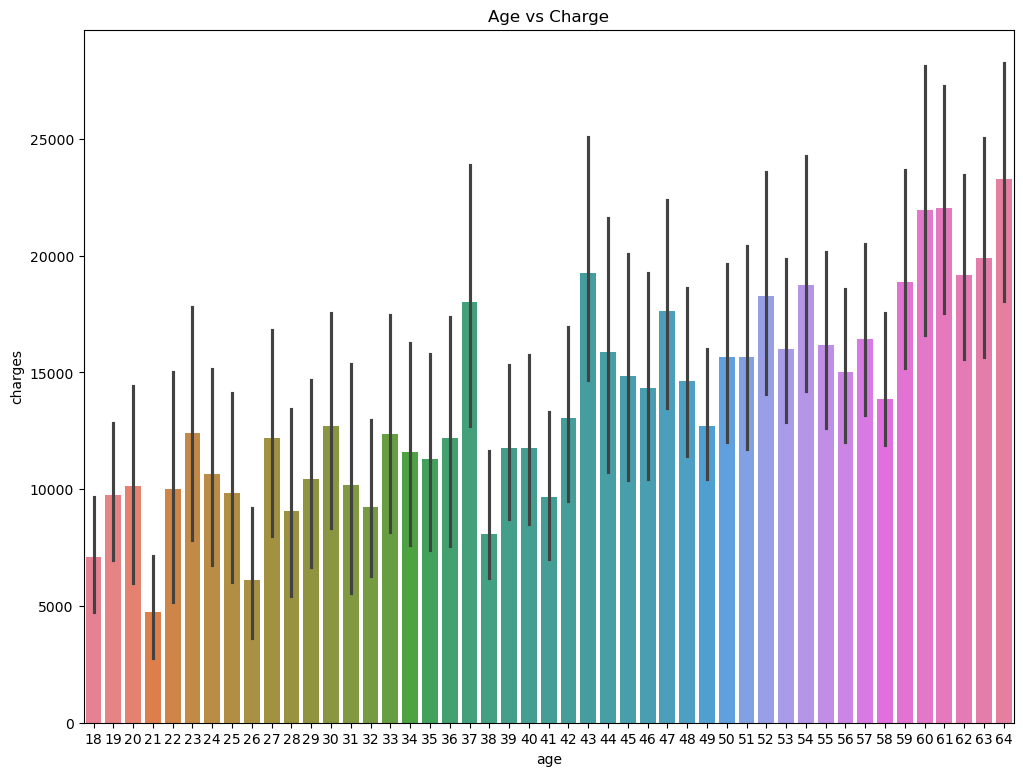

In [16]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')
plt.savefig("sine_wave.png")  

C:\Users\91934\AppData\Local\Temp\ipykernel_30456\1499797580.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')


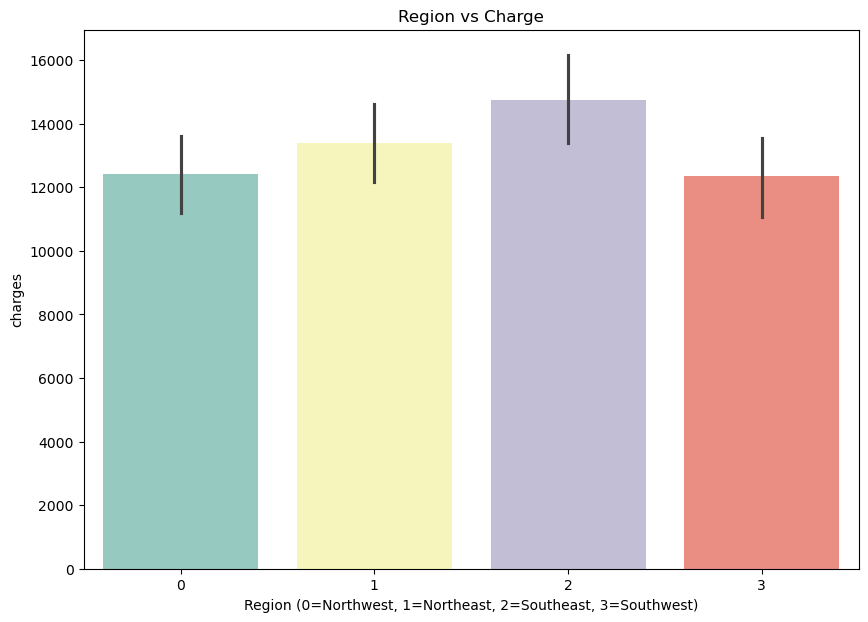

In [17]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
plt.xlabel('Region (0=Northwest, 1=Northeast, 2=Southeast, 3=Southwest)')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')
plt.savefig("region vs charge.png")  

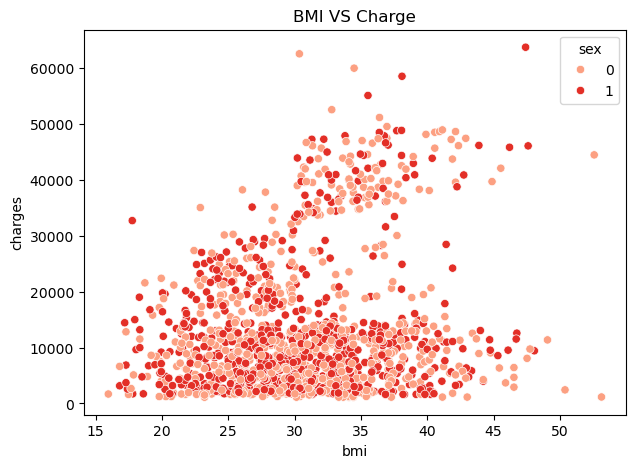

In [18]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')
plt.savefig("BMI vs Charge")  

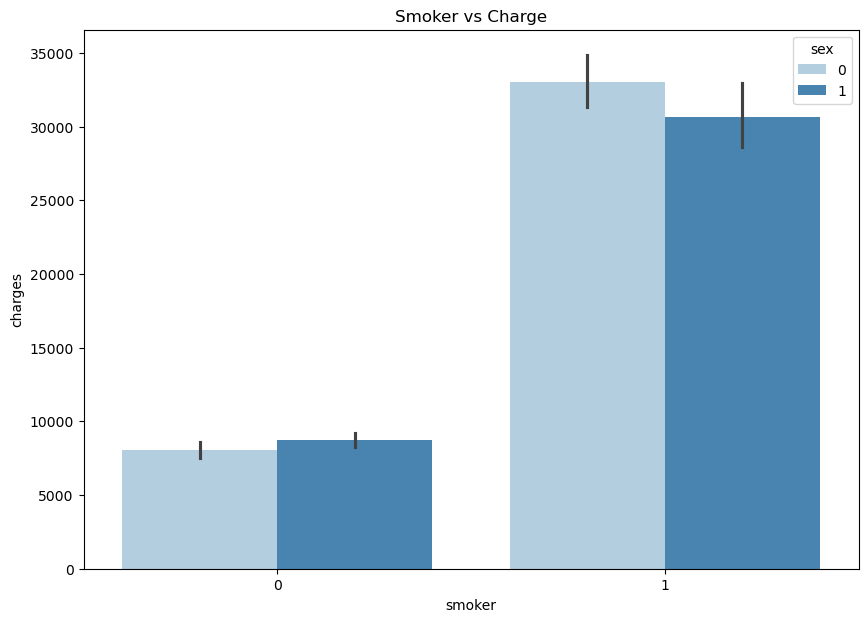

In [19]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')
plt.savefig("smokers vs charge")


C:\Users\91934\AppData\Local\Temp\ipykernel_30456\2541343648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')


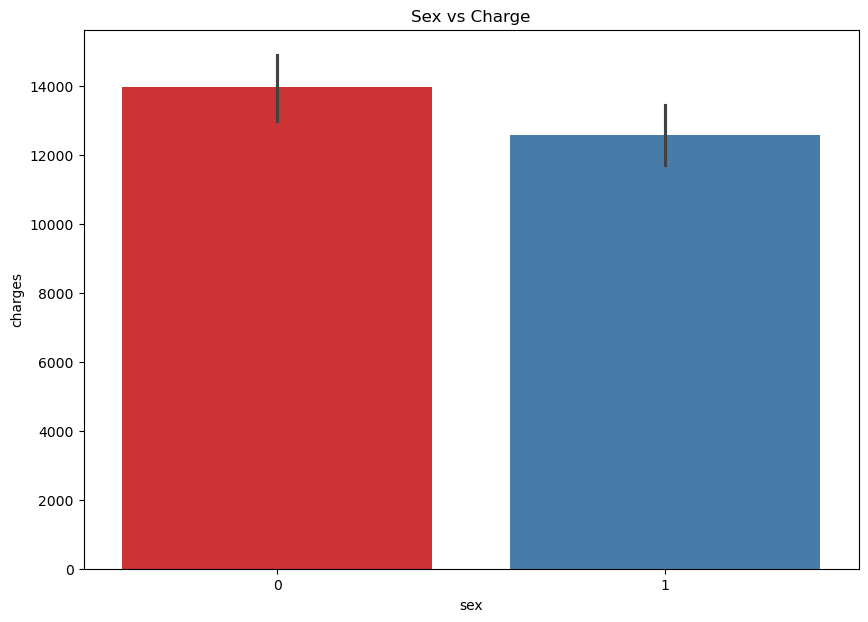

In [20]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charge')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')
plt.savefig("Sex vs Charges")  

In [21]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [22]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


In [23]:
data_encoded = data.copy()
data_encoded['sex'] = data_encoded['sex'].map({'male': 0, 'female': 1})
data_encoded['smoker'] = data_encoded['smoker'].map({'no': 0, 'yes': 1})
data_encoded['region'] = data_encoded['region'].map({
    'southwest': 0,
    'southeast': 1,
    'northwest': 2,
    'northeast': 3
})
correlations = data_encoded.corr()['charges'].sort_values(ascending=False)
print(correlations)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
region      0.006208
sex        -0.057292
Name: charges, dtype: float64


In [24]:
!pip install xgboost

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [26]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: total: 188 ms
Wall time: 132 ms


LinearRegression()

In [27]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.741
R2_score (test) : 0.783
RMSE : 0.480


In [28]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()

In [29]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [30]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8311276912561503


In [31]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train)
X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)
from sklearn.svm import SVR
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())

SVR(C=10, gamma=0.1, tol=0.0001)

In [72]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV_svr: {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV_svr: 0.831
R2_score (train) : 0.857
R2 score (test) : 0.871
RMSE : 0.372


In [33]:
print("Predicted Charges:", y_scaler.inverse_transform(svr.predict(X_scaler.transform(np.array([[30, 0, 1, 28, 1, 1]]))).reshape(-1,1))[0][0])


Predicted Charges: 0.4460841052377055


In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X = data_copy.drop('charges', axis=1).values
y = data_copy['charges'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train)

X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test)

svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())

person = np.array([[30, 0, 1, 28, 1, 1]])  

person_scaled = X_scaler.transform(person)

predicted_charge = y_scaler.inverse_transform(svr.predict(person_scaled).reshape(-1,1))[0][0]

print("Rs.", round(predicted_charge, 2))


Rs. 18672.33


In [35]:
import pickle

with open("svr_model.pkl", "wb") as f:
    pickle.dump({
        "model": svr,
        "X_scaler": X_scaler,
        "y_scaler": y_scaler
    }, f)


In [36]:
import pickle
with open("svr_model.pkl", "wb") as f:
    pickle.dump(svr, f)
with open("X_scaler.pkl", "wb") as f:
    pickle.dump(X_scaler, f)

with open("y_scaler.pkl", "wb") as f:
    pickle.dump(y_scaler, f)


In [37]:
import numpy as np

y_pred_test = svr.predict(X_test_scaled)

y_test_orig = y_scaler.inverse_transform(y_test_scaled)
y_pred_orig = y_scaler.inverse_transform(y_pred_test.reshape(-1,1))
accuracy_percent = 100*(1- np.abs(y_test_orig - y_pred_orig)/ y_test_orig)

accuracy_percent = np.clip(accuracy_percent,0,100)

mean_accuracy = np.mean(accuracy_percent)
print("Approximate Accuracy (%):", round(mean_accuracy, 2))


Approximate Accuracy (%): 75.55
